## 2.2.1 Importaion des bibliothèques

In [495]:
import numpy as np
import pandas as pd
from scipy.io import arff
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
from matplotlib import pyplot as plt
import seaborn as sns
from seaborn import axes_style
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import neighbors, metrics,svm, datasets, preprocessing, model_selection
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing

!pip install nashpy
import nashpy as nash

## 2.2.2 Importaion du jeu de données

In [496]:
df = pd.read_csv('csv_result-Autism-Adult-Data2.csv') #Importing the Data set.
df

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,1,0,0,1,1,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,2,1,1,0,1,0,0,0,1,0,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,3,1,1,0,1,1,0,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,4,1,1,0,1,0,0,1,1,0,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,5,1,0,0,0,0,0,0,1,0,...,f,?,no,no,Egypt,no,2,18 and more,?,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,301,1,0,0,1,0,0,0,1,0,...,m,White-European,no,no,Ireland,no,3,18 and more,Self,NO
509,301,1,0,0,1,0,0,0,1,0,...,m,White-European,no,no,Ireland,no,3,18 and more,Self,NO
510,301,1,0,0,1,0,0,0,1,0,...,m,White-European,no,no,Ireland,no,3,18 and more,Self,NO
511,301,1,0,0,1,0,0,0,1,0,...,m,White-European,no,no,Ireland,no,3,18 and more,Self,NO


## 2.2.3 Description des données

In [497]:
df.describe() #Describe

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,212.988304,0.830409,0.251462,0.261209,0.703704,0.298246,0.189084,0.245614,0.807018,0.210526,0.354776,4.152047
std,99.523493,0.375639,0.434277,0.439722,0.457069,0.457934,0.391957,0.430871,0.395025,0.408080,0.478912,2.192913
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,129.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000
50%,257.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000
75%,301.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5.000000
max,301.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


In [498]:
df.shape #(rows,columns)

(513, 22)

In [499]:
df.count() #Number of non-NA values

id                 513
A1_Score           513
A2_Score           513
A3_Score           513
A4_Score           513
A5_Score           513
A6_Score           513
A7_Score           513
A8_Score           513
A9_Score           513
A10_Score          513
age                513
gender             513
ethnicity          513
jundice            513
austim             513
contry_of_res      513
used_app_before    513
result             513
age_desc           513
relation           513
Class/ASD          513
dtype: int64

## 2.2.3 Commencez à préparer les données et à les pré-traiter :

## 1- Nettoyage des données : 1.1 : gérer les valeurs manquantes

#### Détecter les valeurs manquantes

In [500]:
missing_val=["N/a","na","?",np.nan] #list of missing values representation
data = pd.read_table('Autism-Adult-Data2.arff',sep = ',', na_values=missing_val) # read the table and consider than the list of missing_val a N/A values
df = data.copy()
df.columns = ['A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score','A10_Score','age','gender','ethnicity','jundice','austim','contry_of_res','used_app_before' ,'result numeric','age_desc','relation','Class/ASD']

df.isnull().sum()

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          74
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result numeric      0
age_desc            0
relation           74
Class/ASD           0
dtype: int64

###### Détection des valeurs manquantes. Ici, nous pouvons voir que nous avons 2 valeurs manquantes dans les colonnes de "âge", 95 dans "ethnicité" et 95 dans "relation"

In [501]:
#  sns.heatmap(df.isnull(), annot=True) # : Heatmap showing attributes containing missing values

#### 	Data imputation: Filling the mean value of the “age” attribute instead of the missing values, “White-European” the most repeated in the data for the column “ethnicity” and “self” for “relation” column. And as shown the sum of missing values became 0.

## 1.2 Instances dupliquées :

In [502]:
df.duplicated().sum() # there is no duplicated data

2

In [503]:
df.isnull().sum()

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          74
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result numeric      0
age_desc            0
relation           74
Class/ASD           0
dtype: int64

In [504]:
df=df.drop_duplicates(keep="first")


In [505]:
df.shape

(511, 21)

## 2 : Transformation des données :

In [506]:
type(df)

pandas.core.frame.DataFrame

### Afficher les attributs numériques et les catégoriques

In [507]:
df.isnull().sum()

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          74
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result numeric      0
age_desc            0
relation           74
Class/ASD           0
dtype: int64

In [508]:
numerical_attributes = df.select_dtypes(include=['int64','float64'])
numerical_attributes.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result numeric
0,1,1,0,1,0,0,0,1,0,1,24.0,5
1,1,1,0,1,1,0,1,1,1,1,27.0,8
2,1,1,0,1,0,0,1,1,0,1,35.0,6
3,1,0,0,0,0,0,0,1,0,0,40.0,2
4,1,1,1,1,1,0,1,1,1,1,36.0,9


In [509]:
categorical_attributes = df.select_dtypes(include=['object'])
categorical_attributes.head()

,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,age_desc,relation,Class/ASD
0,m,Latino,no,yes,Brazil,no,'18 and more',Self,NO
1,m,Latino,yes,yes,Spain,no,'18 and more',Parent,YES
2,f,White-European,no,yes,'United States',no,'18 and more',Self,NO
3,f,NaN,no,no,Egypt,no,'18 and more',NaN,NO
4,m,Others,yes,no,'United States',no,'18 and more',Self,YES


# Nous avons donc 9 attributs catégoriels, et nous devrions les transformer en numérique pour former notre modèle, en utilisant le LabelEncoder(), qui donne à chaque catégorie une représentation numérique, j'ai transformé les données en numérique

In [510]:
# Pour garder les NaN valeurs
original = df
mask = df.isnull()

df = df.astype(str).apply(LabelEncoder().fit_transform)


In [511]:
df2=df.where(~mask, original)


In [512]:
df2.head(20)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result numeric,age_desc,relation,Class/ASD
0,1,1,0,1,0,0,0,1,0,1,...,1,5,0,1,20,0,6,0,4,0
1,1,1,0,1,1,0,1,1,1,1,...,1,5,1,1,51,0,9,0,2,1
2,1,1,0,1,0,0,1,1,0,1,...,0,9,0,1,9,0,7,0,4,0
3,1,0,0,0,0,0,0,1,0,0,...,0,NaN,0,0,26,0,3,0,NaN,0
4,1,1,1,1,1,0,1,1,1,1,...,1,6,1,0,9,0,10,0,4,1
5,0,1,0,0,0,0,0,1,0,0,...,0,3,0,0,9,0,3,0,4,0
6,1,1,1,1,0,0,0,0,1,0,...,1,9,0,0,2,0,6,0,2,0
7,1,1,0,0,1,0,0,1,1,1,...,1,9,0,0,9,0,7,0,4,0
8,1,1,1,1,0,1,1,1,1,0,...,1,2,1,1,17,0,9,0,0,1
9,1,1,1,1,1,1,1,1,1,1,...,1,9,0,0,9,0,2,0,3,1


In [513]:
df2.isnull().sum()

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          74
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result numeric      0
age_desc            0
relation           74
Class/ASD           0
dtype: int64

In [514]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 0 to 512
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         511 non-null    int64 
 1   A2_Score         511 non-null    int64 
 2   A3_Score         511 non-null    int64 
 3   A4_Score         511 non-null    int64 
 4   A5_Score         511 non-null    int64 
 5   A6_Score         511 non-null    int64 
 6   A7_Score         511 non-null    int64 
 7   A8_Score         511 non-null    int64 
 8   A9_Score         511 non-null    int64 
 9   A10_Score        511 non-null    int64 
 10  age              509 non-null    object
 11  gender           511 non-null    int64 
 12  ethnicity        437 non-null    object
 13  jundice          511 non-null    int64 
 14  austim           511 non-null    int64 
 15  contry_of_res    511 non-null    int64 
 16  used_app_before  511 non-null    int64 
 17  result numeric   511 non-null    in

In [515]:
df=df2

In [516]:
df.isnull().sum()

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          74
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result numeric      0
age_desc            0
relation           74
Class/ASD           0
dtype: int64

In [517]:
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result numeric,age_desc,relation,Class/ASD
0,1,1,0,1,0,0,0,1,0,1,...,1,5,0,1,20,0,6,0,4,0
1,1,1,0,1,1,0,1,1,1,1,...,1,5,1,1,51,0,9,0,2,1
2,1,1,0,1,0,0,1,1,0,1,...,0,9,0,1,9,0,7,0,4,0
3,1,0,0,0,0,0,0,1,0,0,...,0,NaN,0,0,26,0,3,0,NaN,0
4,1,1,1,1,1,0,1,1,1,1,...,1,6,1,0,9,0,10,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,0,1,0,0,0,0,0,0,0,1,...,0,9,1,0,9,0,3,0,4,0
509,0,1,1,1,1,1,1,1,0,1,...,0,9,0,0,9,0,9,0,4,1
510,1,1,1,1,1,1,1,0,1,1,...,1,9,0,0,8,0,10,0,4,1
511,1,1,1,0,0,0,0,0,0,1,...,0,2,0,0,10,0,5,0,4,0


In [518]:
numerical_attributes = df.select_dtypes(include=['int64','float64'])
numerical_attributes.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,jundice,austim,contry_of_res,used_app_before,result numeric,age_desc,Class/ASD
0,1,1,0,1,0,0,0,1,0,1,1,0,1,20,0,6,0,0
1,1,1,0,1,1,0,1,1,1,1,1,1,1,51,0,9,0,1
2,1,1,0,1,0,0,1,1,0,1,0,0,1,9,0,7,0,0
3,1,0,0,0,0,0,0,1,0,0,0,0,0,26,0,3,0,0
4,1,1,1,1,1,0,1,1,1,1,1,1,0,9,0,10,0,1


In [519]:
categorical_attributes = df.select_dtypes(include=['object'])
categorical_attributes

,age,ethnicity,relation
0,7,5,4
1,10,5,2
2,18,9,4
3,24,NaN,NaN
4,19,6,4
...,...,...,...
508,24,9,4
509,5,9,4
510,26,9,4
511,1,2,4


## 1- Données bruyantes : supprimer les valeurs aberrantes

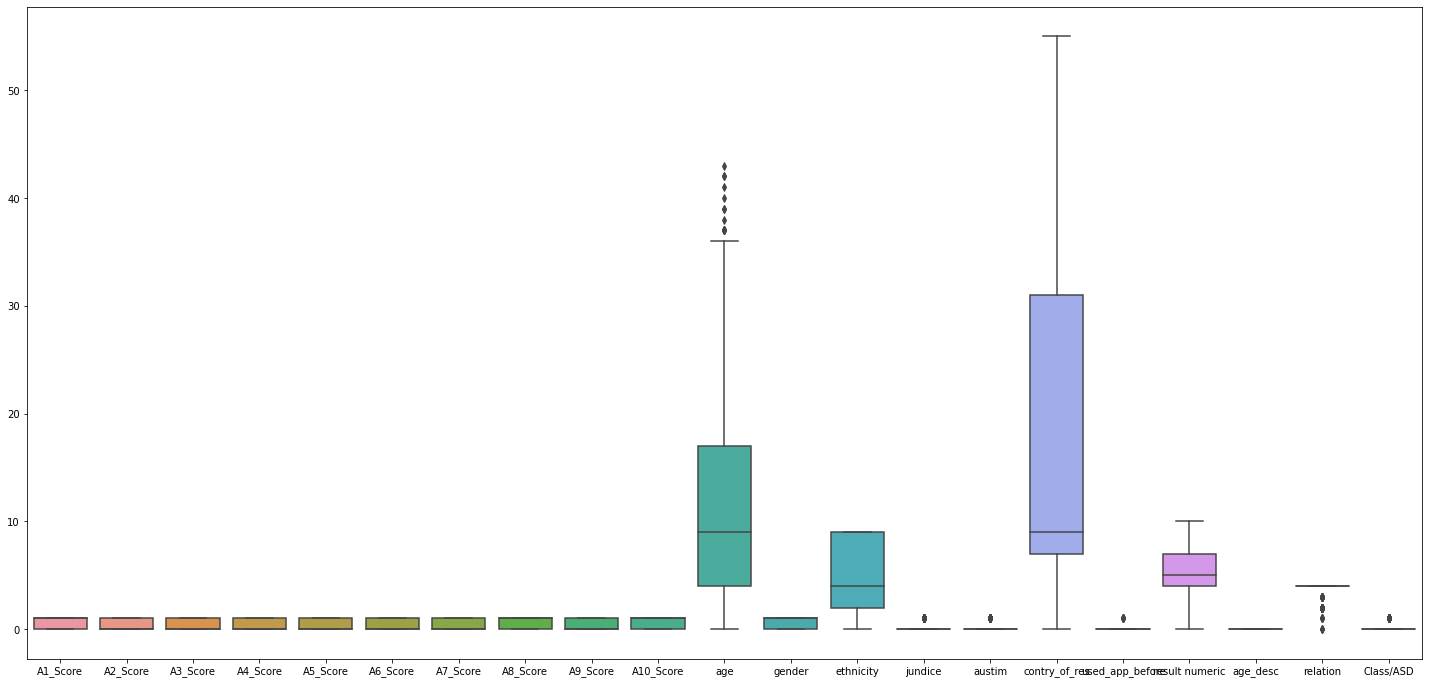

In [520]:
fig = plt.figure(figsize =(25, 12))
sns.boxplot(data=df)
plt.show() # the boxplot showing the outliers

## Comme indiqué, seul l'attribut "age" a des valeurs aberrantes. Nous devons donc le gérer en utilisant les centiles. Nous avons 8 instances supérieures au seuil maximum et 0 instance inférieure au minimum

In [521]:
df.isnull().sum()

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          74
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result numeric      0
age_desc            0
relation           74
Class/ASD           0
dtype: int64

In [522]:
#Explore samples that are above 99.1% percentile and below 1% percentile rank

min_thresold, max_thresold = df.age.quantile([0.01,0.99])
min_thresold, max_thresold

(0.0, 39.0)

### les instances des valeurs aberrantes de l'attribut "age":

In [523]:
df[df.age  > max_thresold]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result numeric,age_desc,relation,Class/ASD
6,1,1,1,1,0,0,0,0,1,0,...,1,9,0,0,2,0,6,0,2,0
202,1,1,1,1,1,1,1,0,1,1,...,0,9,0,1,9,0,10,0,3,1
430,1,1,1,1,1,1,1,1,1,1,...,1,9,1,1,55,0,2,0,4,1
447,1,1,1,1,1,1,1,0,1,1,...,1,9,0,0,9,0,10,0,4,1
494,1,0,1,1,0,0,0,0,0,0,...,0,9,0,0,9,0,4,0,4,0


In [524]:
df[df.age < min_thresold]


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result numeric,age_desc,relation,Class/ASD


### supprimer les valeurs aberrantes

In [525]:
df = df[(df.age <=max_thresold) & (df.age>=min_thresold)]
df.shape

(504, 21)

### Après avoir supprimé les valeurs aberrantes, nous pouvons voir le boxplot

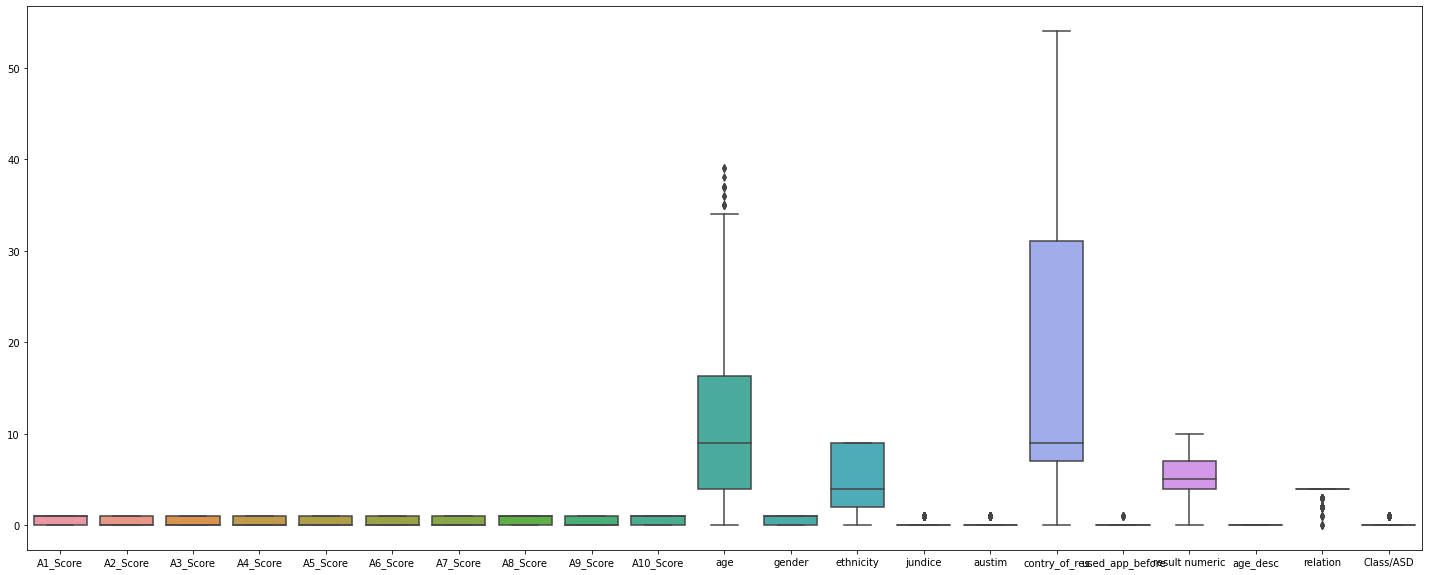

In [526]:
fig = plt.figure(figsize =(25, 10))
sns.boxplot(data=df)
plt.show() 

## intégration de données

<AxesSubplot:xlabel='Class/ASD', ylabel='count'>

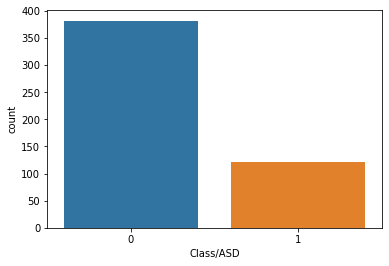

In [527]:
sns.countplot(x='Class/ASD', data=df)

In [528]:
# fig1 = plt.figure(figsize=(6,6))
# sns.pairplot(df.iloc[:,1:],hue='Class/ASD',palette='Set2')

### Heatmap montrant la matrice de corrélation### Heatmap showing the correlation matrix

<AxesSubplot:>

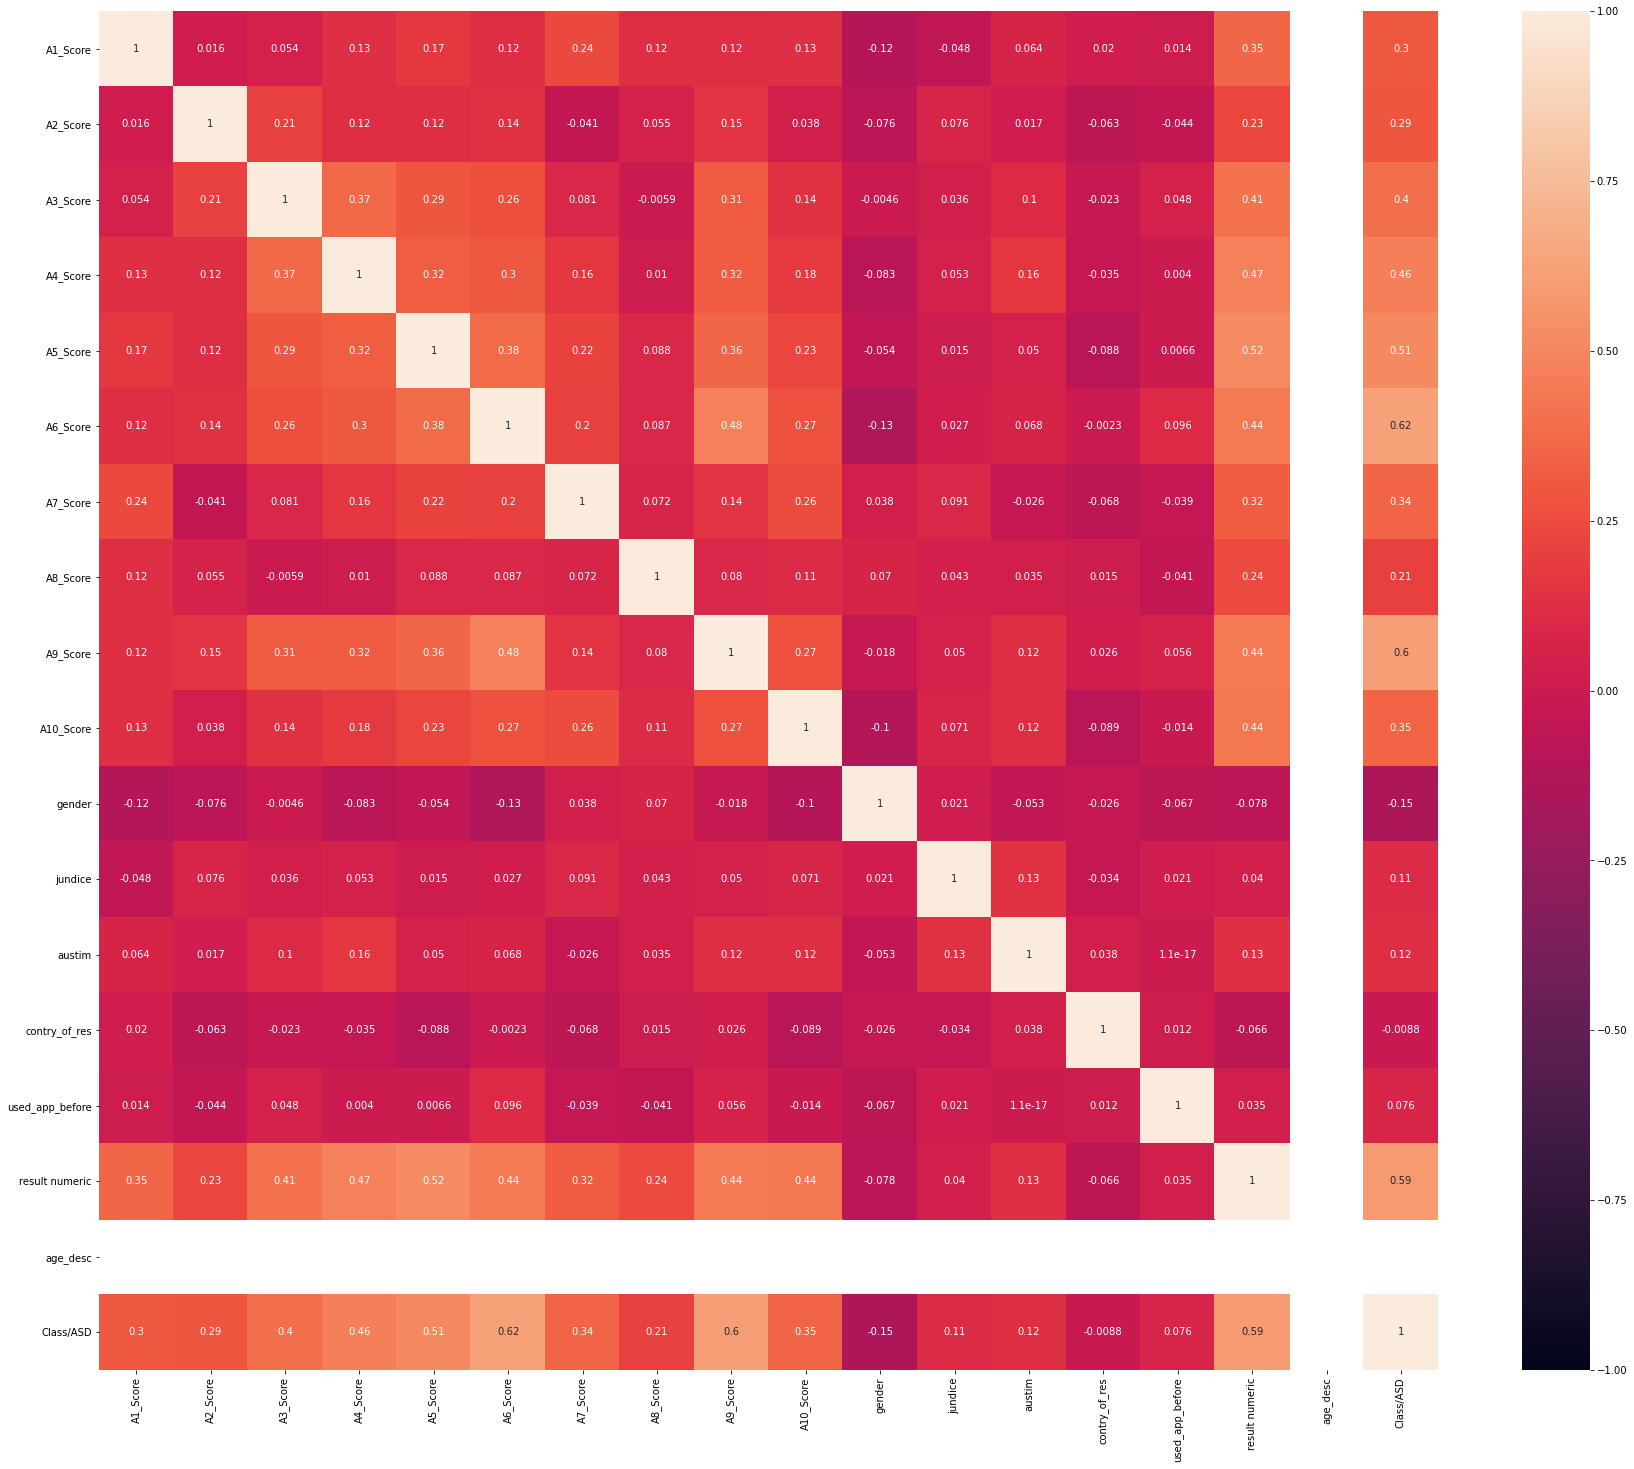

In [529]:
fig2 = plt.figure(figsize=(30,25))
sns.heatmap(df.corr(),vmax=1.0,vmin=-1.0,annot=True)

### Countplot de tous les attributs

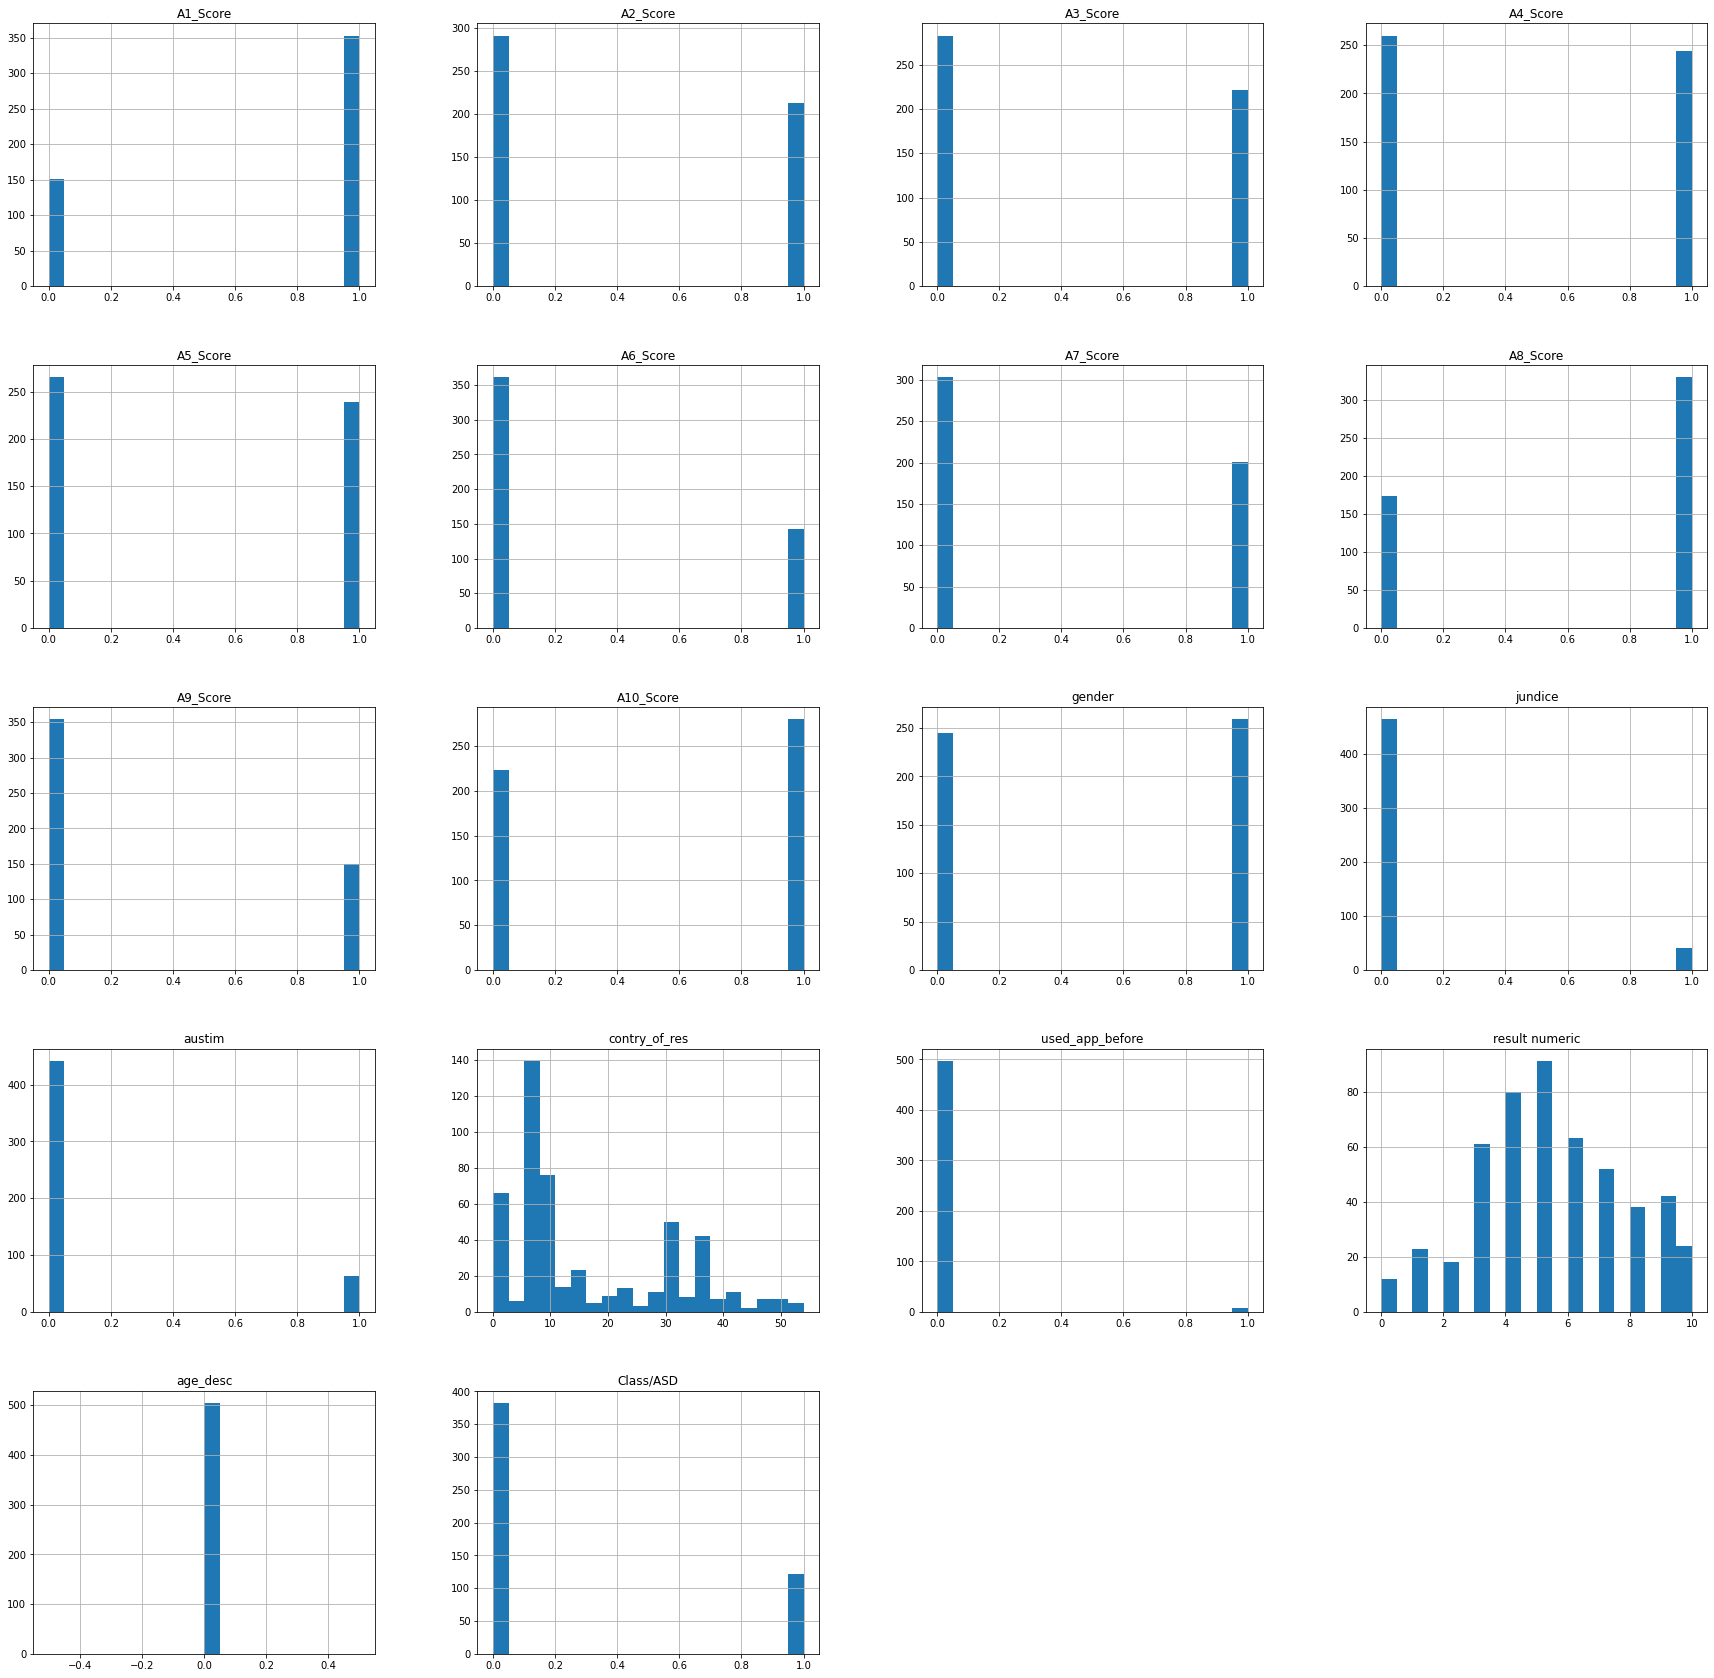

In [530]:
df.hist(bins=20, figsize=(30,30)); 

 Pour jouer un examen global, la matrice de corrélation considère les différentes qualités présentes dans la Dataframe.

 Les qualités présentes dans le cadre relationnel doivent être communiquées sous forme de valeur décimale dans la portée [-1,+1] montrant une corrélation inverse ou une relation immédiate individuellement.

 Au moment où la valeur déterminée de la relation est proche de la valeur 0, il est absurde de s'attendre à caractériser la corrélation entre les attributs considérés.

 Il n'y a pas de corrélation pour tous les attributs sauf « age_desc ». Donc il faut le supprimer

In [531]:
df =df.drop(columns=["age_desc"]) # removing the age_desc column


In [532]:
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result numeric,relation,Class/ASD
0,1,1,0,1,0,0,0,1,0,1,7,1,5,0,1,20,0,6,4,0
1,1,1,0,1,1,0,1,1,1,1,10,1,5,1,1,51,0,9,2,1
2,1,1,0,1,0,0,1,1,0,1,18,0,9,0,1,9,0,7,4,0
3,1,0,0,0,0,0,0,1,0,0,24,0,NaN,0,0,26,0,3,NaN,0
4,1,1,1,1,1,0,1,1,1,1,19,1,6,1,0,9,0,10,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,0,1,0,0,0,0,0,0,0,1,24,0,9,1,0,9,0,3,4,0
509,0,1,1,1,1,1,1,1,0,1,5,0,9,0,0,9,0,9,4,1
510,1,1,1,1,1,1,1,0,1,1,26,1,9,0,0,8,0,10,4,1
511,1,1,1,0,0,0,0,0,0,1,1,0,2,0,0,10,0,5,4,0


<AxesSubplot:>

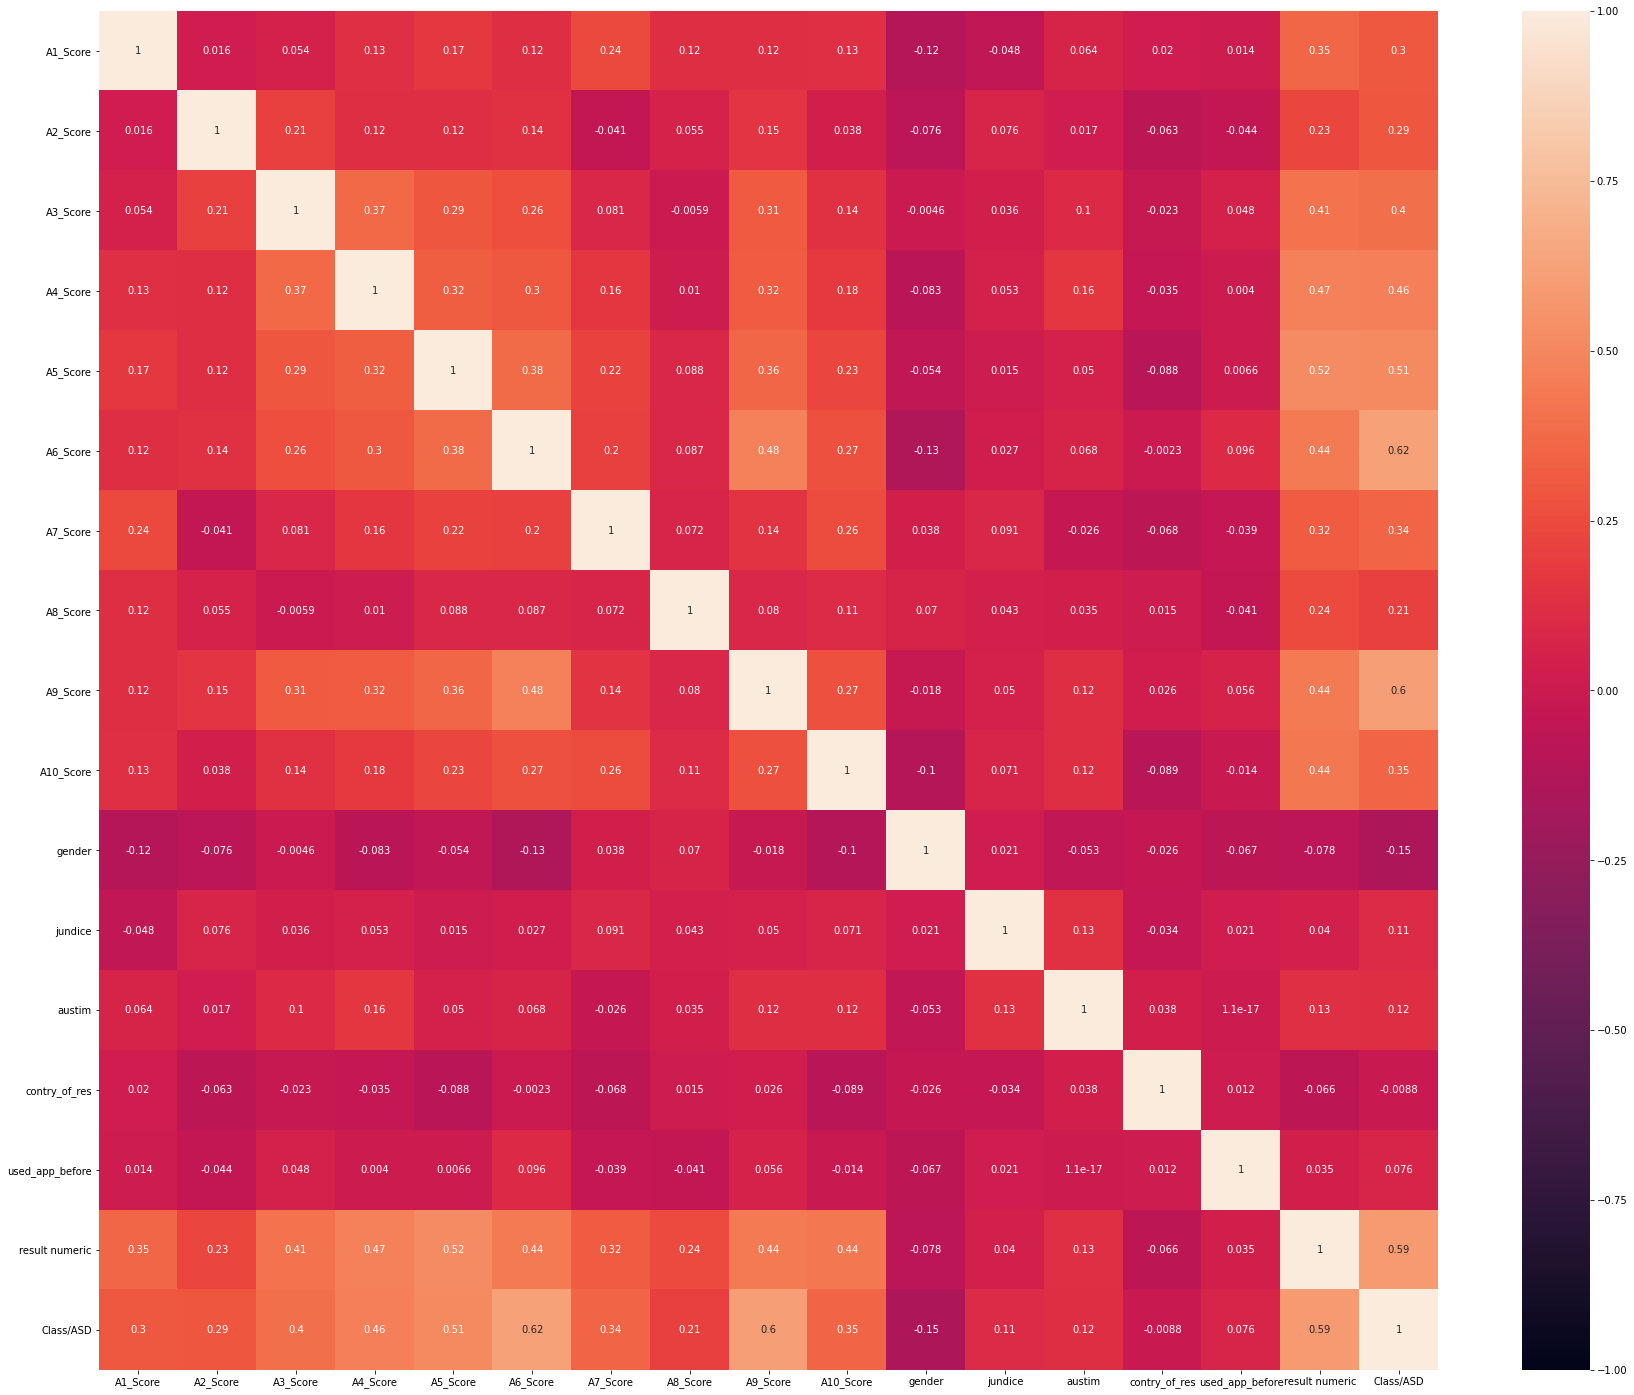

In [533]:
fig2 = plt.figure(figsize=(30,25))
sns.heatmap(df.corr(),vmax=1.0,vmin=-1.0,annot=True) #correlation  matrix after removing the age_desc attributes 

### 3- Réduction des données :
Comme nous n'avons pas beaucoup d'attributs (seulement 20) et qu'il n'y a pas de grande corrélation entre eux, il n'est pas nécessaire de faire la "réduction des données". Sinon, la réduction à l'aide de l'ACP rendra impossible la visualisation des données ou leur analyse, il n'y a donc pas grand besoin de perdre ces fonctionnalités.

### 4- transformation des données :
Étant donné que les données sont binaires, 0 ou 1, et catégorielles, il n'est donc pas nécessaire de normaliser ou de standardiser.

### 5- Discrétisation des données :
Comme indiqué ci-dessous, les valeurs de toutes les données sont limitées, non continues, il n'est donc pas nécessaire d'appliquer la discrétisation des données.

# Three way clustering using GTRS

In [534]:
df_U=df.copy()

## 2.2.4 Division du jeu de données U en C et M 


In [535]:

set_M = df_U[df_U.isnull().values.any(axis=1)]
set_M

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result numeric,relation,Class/ASD
3,1,0,0,0,0,0,0,1,0,0,24,0,NaN,0,0,26,0,3,NaN,0
11,0,1,1,1,1,1,0,0,1,0,0,0,NaN,0,0,17,0,7,NaN,0
12,1,0,0,0,0,0,1,1,0,1,0,1,NaN,0,0,16,0,5,NaN,0
13,1,0,0,0,0,0,1,1,0,1,0,0,NaN,0,0,13,0,5,NaN,0
18,0,0,0,0,0,0,1,1,0,1,17,1,NaN,1,0,7,0,4,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,1,0,0,1,1,0,0,0,0,0,2,1,NaN,0,0,36,0,4,NaN,0
437,1,1,0,0,0,0,0,1,0,1,4,0,NaN,0,0,36,0,5,NaN,0
452,0,0,1,1,1,0,0,0,0,1,2,0,NaN,1,0,36,0,5,NaN,0
484,0,1,0,0,0,0,0,1,1,0,4,1,NaN,0,0,36,0,4,NaN,0


In [536]:
set_CC = df_U[~df_U.isnull().values.any(axis=1)]
set_C = df_U[~df_U.isnull().values.any(axis=1)]
set_C

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result numeric,relation,Class/ASD
0,1,1,0,1,0,0,0,1,0,1,7,1,5,0,1,20,0,6,4,0
1,1,1,0,1,1,0,1,1,1,1,10,1,5,1,1,51,0,9,2,1
2,1,1,0,1,0,0,1,1,0,1,18,0,9,0,1,9,0,7,4,0
4,1,1,1,1,1,0,1,1,1,1,19,1,6,1,0,9,0,10,4,1
5,0,1,0,0,0,0,0,1,0,0,0,0,3,0,0,9,0,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,0,1,0,0,0,0,0,0,0,1,24,0,9,1,0,9,0,3,4,0
509,0,1,1,1,1,1,1,1,0,1,5,0,9,0,0,9,0,9,4,1
510,1,1,1,1,1,1,1,0,1,1,26,1,9,0,0,8,0,10,4,1
511,1,1,1,0,0,0,0,0,0,1,1,0,2,0,0,10,0,5,4,0


In [537]:
#initialization of Class attributes for clustering label comparison 
df_U['Cluster'] = 0

In [538]:
# verification des valeurs de CLASSE, on a juste 0 et 1 alors on va choisir 2 cluster
df_U["Class/ASD"].value_counts()


0    382
1    122
Name: Class/ASD, dtype: int64

# 2.2.5 Clustering avec K-means

In [539]:
kmeans = KMeans(n_clusters=2, max_iter=50)
kmeans.fit(set_C)

KMeans(max_iter=50, n_clusters=2)

In [540]:
kmeans.labels_

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [541]:
# assign the label
set_C['Cluster'] = kmeans.labels_
set_C.head(10)

C:\Users\houss\AppData\Local\Temp/ipykernel_3068/388678496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_C['Class'] = kmeans.labels_


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result numeric,relation,Class/ASD,Class
0,1,1,0,1,0,0,0,1,0,1,...,1,5,0,1,20,0,6,4,0,1
1,1,1,0,1,1,0,1,1,1,1,...,1,5,1,1,51,0,9,2,1,0
2,1,1,0,1,0,0,1,1,0,1,...,0,9,0,1,9,0,7,4,0,1
4,1,1,1,1,1,0,1,1,1,1,...,1,6,1,0,9,0,10,4,1,1
5,0,1,0,0,0,0,0,1,0,0,...,0,3,0,0,9,0,3,4,0,1
7,1,1,0,0,1,0,0,1,1,1,...,1,9,0,0,9,0,7,4,0,1
8,1,1,1,1,0,1,1,1,1,0,...,1,2,1,1,17,0,9,0,1,1
9,1,1,1,1,1,1,1,1,1,1,...,1,9,0,0,9,0,2,3,1,1
10,0,1,0,1,1,1,1,0,0,1,...,0,0,0,0,21,0,7,2,0,0
14,1,1,0,1,1,0,0,1,0,1,...,1,0,0,1,2,0,7,2,0,1


# 2.2.6 Génération des valeurs manquantes

In [542]:
def addMissingValues(U,C):
    for col in C:
            col_missing_rate = U[col].isna().mean()
            vals_to_nan = C[col].dropna().sample(frac=col_missing_rate).index
            C.loc[vals_to_nan, col] = np.NaN
    return C


In [543]:
set_C=addMissingValues(df_U, set_C)

C:\Users\houss\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [544]:
set_C.isnull().sum()

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 0
gender              0
ethnicity          62
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result numeric      0
relation           62
Class/ASD           0
Class               0
dtype: int64

# 2.2.7 Division C en Uc et Um

In [545]:
set_Um = set_C[set_C.isnull().values.any(axis=1)]
set_Uc=set_C[~set_C.isnull().values.any(axis=1)]
set_Um

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result numeric,relation,Class/ASD,Class
10,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,NaN,0.0,0.0,21.0,0.0,7.0,2,0.0,0.0
21,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0,0.0,0.0,11.0,0.0,6.0,NaN,0.0,1.0
27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,3,0.0,0.0,2.0,0.0,1.0,NaN,0.0,1.0
28,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,NaN,0.0,0.0,8.0,0.0,5.0,4,0.0,1.0
31,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,6,0.0,0.0,2.0,0.0,5.0,NaN,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,NaN,0.0,0.0,8.0,0.0,3.0,4,0.0,1.0
491,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,5,0.0,0.0,40.0,0.0,6.0,NaN,0.0,0.0
492,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,5,0.0,0.0,40.0,0.0,2.0,NaN,1.0,0.0
495,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,NaN,0.0,0.0,10.0,0.0,4.0,4,0.0,1.0


In [546]:
set_Uc

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result numeric,relation,Class/ASD,Class
0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,5,0.0,1.0,20.0,0.0,6.0,4,0.0,1.0
1,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,5,1.0,1.0,51.0,0.0,9.0,2,1.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,9,0.0,1.0,9.0,0.0,7.0,4,0.0,1.0
4,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,6,1.0,0.0,9.0,0.0,10.0,4,1.0,1.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,3,0.0,0.0,9.0,0.0,3.0,4,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,9,1.0,1.0,8.0,0.0,2.0,4,1.0,1.0
508,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,9,1.0,0.0,9.0,0.0,3.0,4,0.0,1.0
509,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,9,0.0,0.0,9.0,0.0,9.0,4,1.0,1.0
511,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2,0.0,0.0,10.0,0.0,5.0,4,0.0,1.0


# 4- Application de l’approche Three-way clustering


#  2.2.8 Calcul de la fonction d’évaluation 

In [547]:
#donne la distance entre deux object en ignorant les valeur manquant
def dis(Oi,Oj,M,C):
    diff=0
    for i in M.columns:
        diff +=np.nansum(M[i][Oi]-C[i][Oj])**2
    return np.sqrt(diff)


In [548]:
#chaque objet de set_Um avec tout les objet de set_Uc
def distance(M,C):
    dist=[]
    l=-1
    for i in M.index :
        l=l+1
        dist.append([])
        for j in C.index :
            dist[l].append(dis(i,j,M,C))
    Table =pd.DataFrame(dist,M.index,C.index)
    return Table

In [549]:
## déterminer les Kèmes voisins proches
#Trier ces distances et calculer les voisins les plus proches pour chaque oi avec des valeurs manquantes
def neighbor_Um(k,M,C):
    list_Index = M.index.tolist()
    list_Index
    K_N=[]
    for i in list_Index:
          K_N.append(distance(M,C).loc[i].sort_values().head(k))
    return K_N

In [550]:
distance(set_Um,set_Uc)

,0,1,2,4,5,7,8,9,14,15,...,501,502,503,505,506,507,508,509,511,512
10,7.071068,31.511903,21.047565,22.135944,13.114877,16.643317,6.000000,20.049938,19.183326,20.174241,...,19.467922,14.352700,14.832397,27.586228,10.049876,32.357379,26.438608,13.114877,11.661904,30.315013
21,10.954451,40.509258,12.449900,11.958261,11.313708,9.746794,12.529964,11.958261,13.000000,25.377155,...,15.842980,10.677078,10.630146,15.620499,12.369317,22.693611,17.233688,11.224972,9.746794,20.615528
27,31.352831,54.442630,18.000000,17.832555,32.848135,22.934690,36.386811,18.761663,31.811947,38.974351,...,22.090722,28.124722,27.748874,10.344080,28.774989,9.486833,12.569805,29.782545,32.372828,10.099505
28,14.142136,43.531598,5.385165,7.615773,14.352700,3.605551,17.832555,4.690416,14.832397,28.124722,...,12.767145,8.717798,8.602325,11.180340,11.874342,16.583124,10.440307,10.295630,13.266499,14.247807
31,35.085610,56.178288,20.639767,20.149442,37.881394,26.305893,40.447497,22.715633,36.633318,41.557190,...,24.331050,31.890437,31.144823,14.106736,32.155870,10.583005,15.297059,33.241540,37.121422,11.489125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,13.266499,43.600459,8.426150,11.135529,11.224972,5.000000,16.309506,6.164414,12.806248,28.407745,...,14.525839,6.928203,7.874008,14.247807,11.532563,19.313208,13.152946,8.944272,10.583005,17.175564
491,22.068076,13.114877,31.432467,31.527766,35.171011,31.591138,28.530685,31.622777,41.231056,6.855655,...,21.863211,33.867388,33.704599,33.451457,22.360680,35.524639,32.526912,33.391616,33.793490,34.583233
492,22.472205,14.491377,31.843367,32.218007,35.114100,32.000000,29.120440,31.272992,41.545156,8.185353,...,22.135944,34.249088,34.263683,33.630343,22.583180,35.213634,32.465366,33.926391,33.941125,34.612137
495,25.219040,46.032597,12.609520,12.884099,30.099834,18.411953,31.622777,14.491377,30.364453,30.675723,...,13.674794,24.372115,23.790755,5.916080,22.068076,4.358899,6.557439,25.651511,29.120440,3.605551


In [551]:
Nei_DF =pd.DataFrame(neighbor_Um(7,set_Um,set_Uc))

In [552]:
Nei_DF

,0,1,7,8,14,15,16,17,20,29,...,498,499,500,501,502,503,506,507,509,512
10,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
491,NaN,NaN,NaN,NaN,NaN,6.855655,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
492,NaN,NaN,NaN,NaN,NaN,8.185353,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.358899,NaN,3.605551


In [553]:
#calculer la fonction d'évaluation e(ck, j)
#k : nombre de voisins de j
#j= objet de set_Um qui est contient des valeurs manquantes
def evaluation (k,j,k_cluster):
    ev=[]
    C=0
    df1=set_C
    for l in range(k_cluster):
        C=0
        for i in Nei_DF.loc[j].dropna().index:
            if df1.loc[i].loc["Cluster"]== l: 
                    C+=1
        ev.append(C/k)
    return ev

In [554]:
##Déterminer les étiquettes des clusters que nous avonsdef init_list_clusters(k_cluster):
def init_list_clusters(k_cluster):
    list_cluster=[]
    for j in range(k_cluster):
            list_cluster.append("C"+str(j))
    return list_cluster

In [555]:
def eval_all(k_cluster,k,M):
    list_objects=[]
    list_evaluation=[]
    list_cluster=[]
    list_Index = M.index.tolist()
    for i in range(len(list_Index)):
        #list_index[i]: each object oi from Um
        list_objects.append(list_Index[i])
        list_evaluation.append(evaluation(k,list_Index[i],k_cluster))
    df3 = pd.DataFrame(list_evaluation, index = list_objects, columns = init_list_clusters(k_cluster))
    return df3

In [556]:
eval_all(2,7,set_Um)

,C0,C1
10,0.285714,0.714286
21,0.000000,1.000000
27,0.000000,1.000000
28,0.000000,1.000000
31,0.000000,1.000000
...,...,...
481,0.000000,1.000000
491,1.000000,0.000000
492,1.000000,0.000000
495,0.000000,1.000000


In [557]:
# 
def three_way (alpha,beta,k_cluster,k,M):
    list1=[]
    i=0
    df = eval_all(k_cluster,k,M).T
    object_list=df.columns
    cluster_list=df.index.tolist()
    for c in cluster_list:
        inside=[]
        outside=[]
        partial=[]
        list1.append([])
        for o in object_list:
            if (df.loc[c][o]>=alpha):
                inside.append(o)
            elif (df.loc[c][o]<alpha and df.loc[c][o]>beta):
                partial.append(o)
            elif df.loc[c][o] <= beta:
                outside.append(o)
        list1[i].append(c)
        list1[i].append(inside)
        list1[i].append(outside)
        list1[i].append(partial)
        i=i+1
        df3 = pd.DataFrame(list1,columns=["cluster","Inside","Outside","Partial"])
        df3=df3.set_index('cluster')
    return df3

In [558]:
three_way(1,0,2,7,set_Um)

,Inside,Outside,Partial
cluster,,,
C0,"[104, 108, 140, 141, 142, 157, 159, 165, 172, ...","[21, 27, 28, 31, 37, 55, 56, 64, 67, 70, 71, 8...","[10, 49, 57, 290, 458]"
C1,"[21, 27, 28, 31, 37, 55, 56, 64, 67, 70, 71, 8...","[104, 108, 140, 141, 142, 157, 159, 165, 172, ...","[10, 49, 57, 290, 458]"


# 5- Three-Way Clustering en utilisant GTRS

In [559]:
df1=set_C
df5 =three_way (1,0,2,7,set_Um)

Totaly_clustred=0
for i in init_list_clusters(2):
    Totaly_clustred += len(df5["Inside"].loc[i])
    
Totaly_clustred
correctly_Clustred=0
for i in init_list_clusters(2):
    for j in df5["Inside"].loc[i]:
        if df1.loc[j].loc["Cluster"]== int(i[1:]):
            correctly_Clustred+=1

correctly_Clustred

110

In [560]:
## Utility
def Utility (alpha,beta,k_cluster,k):
   
    df4 = eval_all(k_cluster,k,set_Um).T
    object_list=df4.columns
    cluster_list=df4.index.tolist()
    df5 =three_way (alpha,beta,k_cluster,k,set_Um)
    Totaly_clustred=0
    for i in cluster_list:
        Totaly_clustred += len(df5["Inside"].loc[i])
    correctly_Clustred=0
    for i in cluster_list:
        for j in df5["Inside"].loc[i]:
            if df1.loc[j].loc["Cluster"]== int(i[1:]):
                correctly_Clustred+=1
    accuracy=correctly_Clustred/Totaly_clustred
    generality=Totaly_clustred/len(set_Um)
    return accuracy,generality

In [561]:
def payoff(alpha,beta,alpha_,alpha__,betaplus,betaplus2,k_cluster,k): 
    accuracy=Utility(alpha,beta,k_cluster,k)[0] #initialization d''accuracy par alpha=1 et beta=0
    generality=Utility(alpha,beta,k_cluster,k)[1] #initialization de generality par alpha=1 et beta=0

    max_iteration=5 # definir le nombre d'iteration maximal
    iteration=0 # initialization de l'iteration
    list_accuracy=[]#list player A accuracy 
    list_generality=[] #list player G generality
    list_final_accuracy=[]#list accuracy
    list_final_generality=[]#list generality
    list_alpha=[]#list alpha
    list_beta=[]#listbeta

    list_final_accuracy.append(accuracy) #append la liste des accuracy par la valeur de accuracy du 1er ietration
    list_final_generality.append(generality)  #append la liste des generality par la valeur de generality du 1er ietration
    list_alpha.append(alpha)  #append la liste des Alphas par la valeur de Alpha du 1er ietration =1
    list_beta.append(beta)  #append la liste des Betas par la valeur de Beta du 1er ietration =0
    
    while (accuracy>generality and alpha>0.5 and beta < 0.5 and iteration<max_iteration):
        list_accuracy=[] #declaration de list d'accuracy pour construire payoff table
        list_generality=[] #declaration de list de generality pour construire payoff table
        
        #calcul accuracy 
        accuracy_alphamoins2_beta=Utility(alpha__,beta,k_cluster,k)[0]
        accuracy_alphamoins_betaplus=Utility(alpha_,betaplus,k_cluster,k)[0]
        accuracy_alphamoins2_betaplus=Utility(alpha__,betaplus,k_cluster,k)[0]
        accuracy_alpha_betaplus2=Utility(alpha,betaplus2,k_cluster,k)[0]
        accuracy_alphamoins_betaplus2=Utility(alpha_,betaplus2,k_cluster,k)[0]
        accuracy_alphamoins2_betaplus2=Utility(alpha__,betaplus2,k_cluster,k)[0]
        
        #calcul des accuracies selon les strategies 
        
        #calcul generality
        generality_alphamoins2_beta=Utility(alpha__,beta,k_cluster,k)[1]
        generality_alphamoins_betaplus=Utility(alpha_,betaplus,k_cluster,k)[1]
        generality_alphamoins2_betaplus=Utility(alpha__,betaplus,k_cluster,k)[1]
        generality_alpha_betaplus2=Utility (alpha,betaplus2,k_cluster,k)[1]
        generality_alphamoins_betaplus2=Utility(alpha_,betaplus2,k_cluster,k)[1]
        generality_alphamoins2_betaplus2=Utility(alpha__,betaplus2,k_cluster,k)[1]
        
        #calcul des generalities selon les strategies 

        
        #populate matrix payoff
        #premiere ligne joueur A
        l1=[accuracy_alphamoins2_beta,accuracy_alphamoins_betaplus
            ,accuracy_alphamoins2_betaplus]
        #deuxieme ligne joueur A
        l2=[accuracy_alphamoins_betaplus,accuracy_alpha_betaplus2
            ,accuracy_alphamoins_betaplus2]
        #troisieme ligne joueur A
        l3=[accuracy_alphamoins2_betaplus,accuracy_alphamoins_betaplus2
            ,accuracy_alphamoins2_betaplus2]
        #player A list
        list_accuracy.append(l1)
        list_accuracy.append(l2)
        list_accuracy.append(l3)
        
        #premiere colonne joueur G
        c1=[generality_alphamoins2_beta,generality_alphamoins_betaplus
            ,generality_alphamoins2_betaplus]
        #deuxieme colonne joueur G
        c2=[generality_alphamoins_betaplus,generality_alpha_betaplus2
            ,generality_alphamoins_betaplus2]
        #troisieme colonne joueur G
        c3=[generality_alphamoins2_betaplus,generality_alphamoins_betaplus2
            ,generality_alphamoins2_betaplus2]
        #player B list
        list_generality.append(c1)
        list_generality.append(c2)
        list_generality.append(c3)
            
        P_A=np.array(list_accuracy)       #player A
        P_G=np.array(list_generality)     #player G
        game = nash.Game(P_A,P_G)         #game
        
        #Nash Equilibrium
        equilibria = game.support_enumeration()
        for eq in equilibria:
            b=eq
        sigma_r = b[0].tolist()
        sigma_c = b[1].tolist()                    
        accuracy,generality = game[sigma_r, sigma_c]                    
        
        #stratégies gagnantes
        #changement de valeurs de alpha et beta 
        ia=b[0].tolist().index(1)
        ib=b[1].tolist().index(1)
        a,b=["alpha_","betaplus","alpha_betaplus"][ia]
        ,["alpha_","betaplus","alpha_betaplus"][ib]
        #alpha,beta,alpha_,alpha__,betaplus,betaplus2,
        if a=="alpha_" and b=="alpha_":
            alphaprim = alpha__
            betaprim = beta
        if a=="alpha_" and b=="betaplus":
            alphaprim =alpha_
            betaprim = betaplus
        if a=="alpha_" and b=="alpha_betaplus":
            alphaprim = alpha__
            betaprim = betaplus
        if a=="betaplus" and b=="alpha_":
            alphaprim = alpha_
            betaprim = betaplus
        if a=="betaplus" and b=="betaplus":
            alphaprim = alpha
            betaprim = betaplus2
        if a=="betaplus" and b=="alpha_betaplus":
            alphaprim =alpha_
            betaprim =betaplus2
        if a=="alpha_betaplus" and b=="alpha_":
            alphaprim = alpha__
            betaprim = betaplus
        if a=="alpha_betaplus" and b=="betaplus":
            alphaprim = alpha_
            betaprim = betaplus2
        if a=="alpha_betaplus" and b=="alpha_betaplus":
            alphaprim =alpha__
            betaprim = betaplus2
            
        
        alpha0=alpha # enregistrement de valeur de alpha de l'iteration i-1
        beta0=beta #enregistrement de valeur de beta de l'iteration i-1 
        
        #calcul alpha_, alpha__, betaplus, betaplus2
        c = 1.5
        alpha_=alpha-(alpha*Utility(alphaprim,betaprim,k_cluster,k)[1]-
                      Utility(alpha,beta,k_cluster,k)[1])
        alpha__=alpha-c*(alpha*Utility(alphaprim,betaprim,k_cluster,k)[1]-
                         Utility(alpha,beta,k_cluster,k)[1])
        betaplus=beta-(beta*Utility(alphaprim,betaprim,k_cluster,k)[1]-
                       Utility(alpha,beta,k_cluster,k)[1])
        betaplus2=beta-c*(beta*Utility(alphaprim,betaprim,k_cluster,k)[1]-
                          Utility(alpha,beta,k_cluster,k)[1])
        
        #alpha,beta=alphaprim,betaprim
        alpha=alphaprim
        beta=betaprim
        
        #redifine accuracy and genereality
        accuracy = Utility(alpha,beta,k_cluster,k)[0] 
        generality= Utility(alpha,beta,k_cluster,k)[1]
        #remplir les listes 
        list_final_accuracy.append(accuracy)
        list_final_generality.append(generality)
        list_alpha.append(alpha)
        list_beta.append(beta)
        
        iteration=iteration+1
    return list_final_accuracy, list_final_generality, list_alpha, list_beta, alpha0, beta0

In [562]:
alpha,beta,list_final_accuracy,list_final_generality,list_alpha
,list_beta=
payoff(1,0,0.85,0.8,0.15,0.2,2,7)[4]
,payoff(1,0,0.85,0.8,0.15,0.2,2,7)[5],
payoff(1,0,0.85,0.8,0.15,0.2,2,7)[0],
payoff(1,0,0.85,0.8,0.15,0.2,2,7)[1]
,payoff(1,0,0.85,0.8,0.15,0.2,2,7)[2],
payoff(1,0,0.85,0.8,0.15,0.2,2,7)[3]



payoff(1,0,0.85,0.8,0.15,0.2,2,7)

C:\Users\houss\anaconda3\lib\site-packages\nashpy\algorithms\support_enumeration.py:259: RuntimeWarning: 
An even number of (8) equilibria was returned. This
indicates that the game is degenerate. Consider using another algorithm
to investigate.
                  
  warnings.warn(warning, RuntimeWarning)


([1.0, 1.0, 1.0],
 [0.9565217391304348, 0.9652173913043478, 0.9565217391304348],
 [1, 0.8, 0.9869565217391305],
 [0, 0.2, 1.4347826086956523],
 0.8,
 0.2)

In [563]:

d= {'alpha':list_alpha, 'beta': list_beta,'accuracy': list_final_accuracy,'generality':list_final_generality}
df = pd.DataFrame(data=d)


In [564]:
df

,alpha,beta,accuracy,generality
0,1.000000,0.000000,1.0,0.956522
1,0.800000,0.200000,1.0,0.965217
2,0.986957,1.434783,1.0,0.956522


### Après 3 itérations, la boucle s'arrête car beta est devenu >0.5
### La précision est toujours de 100 % et la généralité est passée de 95 % à 96,5 %
### La précision peut rester la même valeur même si la généralité a changé, car la précision est des objets "correctement regroupés", par exemple supposons à la 1ère itération que nous avons 20 objets "regroupés" et que les 20 sont correctement regroupés alors précision = 1 , et dans la 2ème itération la généralité est passée à 25 objets "en cluster" et même les 25 objets sont "correctement regroupés", dans cet exemple la précision est toujours de 100% et la généralité a changé.

In [565]:
distance(set_M,set_CC)

,0,1,2,4,5,7,8,9,10,14,...,502,503,505,506,507,508,509,510,511,512
3,18.411953,29.444864,18.601075,19.313208,29.444864,21.307276,26.514147,19.078784,24.041631,33.570821,...,25.865034,25.651511,18.275667,15.937377,19.287302,17.146428,26.362853,19.697716,28.160256,18.547237
11,8.246211,35.637059,19.924859,21.023796,9.273618,14.662878,3.464102,18.734994,4.582576,15.297059,...,11.135529,11.958261,26.814175,10.630146,31.827661,25.748786,9.899495,27.766887,7.745967,29.647934
12,8.366600,36.715120,19.519221,21.023796,7.615773,14.177447,5.099020,17.916473,6.082763,14.352700,...,10.488088,11.618950,26.286879,10.723805,31.352831,25.199206,9.899495,27.802878,6.480741,29.240383
13,10.198039,39.597980,18.627936,20.248457,4.898979,13.000000,6.480741,17.000000,8.660254,11.489125,...,8.366600,9.848858,25.553865,11.958261,30.708305,24.515301,8.000000,27.110883,3.741657,28.548205
18,16.703293,44.911023,4.472136,7.141428,17.291616,6.633250,20.566964,4.242641,21.633308,17.233688,...,11.789826,11.575837,8.366600,14.142136,13.564660,7.615773,13.453624,11.313708,16.522712,11.401754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,17.029386,17.944358,31.638584,32.588341,27.202941,29.034462,20.000000,30.610456,15.524175,34.205263,...,28.530685,29.000000,36.318040,18.947295,39.786933,34.942810,27.784888,37.456642,26.153394,38.249183
437,16.401219,16.881943,30.528675,31.416556,27.404379,28.284271,20.074860,29.832868,15.620499,34.249088,...,28.231188,28.600699,35.071356,18.165902,38.444766,33.704599,27.440845,36.083237,26.210685,36.959437
452,17.029386,17.720045,31.575307,32.403703,27.276363,29.000000,19.798990,30.708305,15.329710,34.176015,...,28.425341,28.861739,36.318040,18.947295,39.812058,34.942810,27.568098,37.322915,26.115130,38.275318
484,16.552945,17.146428,30.675723,31.591138,27.349589,28.372522,20.248457,29.748950,15.842980,34.351128,...,28.390139,28.757608,35.114100,18.138357,38.405729,33.689761,27.640550,36.235342,26.305893,36.972963


In [566]:
Nei_DF =pd.DataFrame(neighbor_Um(7,set_M,set_CC))
Nei_DF

,0,1,5,8,10,15,16,17,28,36,...,481,482,487,488,491,492,498,500,505,511
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.795832,NaN,NaN,NaN
11,NaN,NaN,NaN,3.464102,4.582576,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,5.099020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,4.898979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.741657
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.162278,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [567]:
Result =three_way(alpha,beta,2,7,set_M)

In [568]:
Result

,Inside,Outside,Partial
cluster,,,
C0,"[3, 23, 78, 80, 237, 269, 275, 276, 336, 337, ...","[11, 12, 13, 18, 19, 24, 79, 215, 220, 256, 28...",[427]
C1,"[11, 12, 13, 18, 19, 24, 79, 215, 220, 256, 28...","[3, 23, 78, 80, 237, 269, 275, 276, 336, 337, ...",[427]


In [575]:
pip install tabulate


Note: you may need to restart the kernel to use updated packages.


In [576]:
from tabulate import tabulate

In [642]:
col_names = ["Objets", "Cluster","Classification"]
data = []
Y_CLassification= set_M["Class/ASD"]
for i in range(len(Result.iloc[0][0])):
    data.append([])
    data[i].append(Result.iloc[0][0][i])
    data[i].append(0)
    data[i].append(set_M["Class/ASD"][Result.iloc[0][0][i]])



print(tabulate(data, headers=col_names, tablefmt="grid", showindex="always"))


+----+----------+-----------+------------------+
|    |   Objets |   Cluster |   Classification |
+====+==========+===========+==================+
|  0 |        3 |         0 |                0 |
+----+----------+-----------+------------------+
|  1 |       23 |         0 |                0 |
+----+----------+-----------+------------------+
|  2 |       78 |         0 |                0 |
+----+----------+-----------+------------------+
|  3 |       80 |         0 |                0 |
+----+----------+-----------+------------------+
|  4 |      237 |         0 |                0 |
+----+----------+-----------+------------------+
|  5 |      269 |         0 |                1 |
+----+----------+-----------+------------------+
|  6 |      275 |         0 |                0 |
+----+----------+-----------+------------------+
|  7 |      276 |         0 |                0 |
+----+----------+-----------+------------------+
|  8 |      336 |         0 |                0 |
+----+----------+---

In [643]:
col_names = ["Objets", "Cluster","Classification"]
data = []
Y_CLassification= set_M["Class/ASD"]
for i in range(len(Result.iloc[1][0])):
    data.append([])
    data[i].append(Result.iloc[1][0][i])
    data[i].append(1)
    data[i].append(set_M["Class/ASD"][Result.iloc[1][0][i]])



print(tabulate(data, headers=col_names, tablefmt="grid", showindex="always"))


+----+----------+-----------+------------------+
|    |   Objets |   Cluster |   Classification |
+====+==========+===========+==================+
|  0 |       11 |         1 |                0 |
+----+----------+-----------+------------------+
|  1 |       12 |         1 |                0 |
+----+----------+-----------+------------------+
|  2 |       13 |         1 |                0 |
+----+----------+-----------+------------------+
|  3 |       18 |         1 |                0 |
+----+----------+-----------+------------------+
|  4 |       19 |         1 |                0 |
+----+----------+-----------+------------------+
|  5 |       24 |         1 |                0 |
+----+----------+-----------+------------------+
|  6 |       79 |         1 |                0 |
+----+----------+-----------+------------------+
|  7 |      215 |         1 |                0 |
+----+----------+-----------+------------------+
|  8 |      220 |         1 |                0 |
+----+----------+---

## Après avoir comparé les deux clusters avec la classification initiale on peut voir la grande différence de regroupement des objets pour le cluster 1, même si les objets du cluster dans le cluster 0, qui existent réellement dans la classe 0 (vrai négatif) sont plus que les faux positif et faux négatif

In [652]:
from sklearn.metrics import silhouette_score



# intialise kmeans
kmeans = KMeans(n_clusters=2, max_iter=50)
kmeans.fit(set_CC)

cluster_labels_K = kmeans.labels_

# silhouette score
silhouette_avg_K = silhouette_score(set_CC, cluster_labels_K)
print("For n_clusters= 2, the silhouette score is {1}".format(i, silhouette_avg_K))



For n_clusters= 2, the silhouette score is 0.48678065315434677


## Après cette comparaison, nous pouvons distinguer que le taux d'erreur élevé est dû au choix de l'algorithme K-means car après vérification des valeurs de silhouette, nous avons vu qu'il est de 0,48 inférieur à 0,5